In [1]:
 ! pip install -q kaggle

In [46]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarvajith","key":"4de4b17496d3e1408caf4598ce60a423"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Download data
! kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:51<00:00, 40.9MB/s]
100% 3.10G/3.10G [00:51<00:00, 64.5MB/s]


In [ ]:
# ! mkdir data
! unzip breast-histopathology-images.zip -d data

In [4]:
breast_img = glob.glob('/content/data/**/*.png', recursive = True)

In [5]:
negative = []
positive = []

for img in tqdm(breast_img):
    if img[-5] == '0' :
        negative.append(img)
    
    elif img[-5] == '1' :
        positive.append(img)

100%|██████████| 555048/555048 [00:00<00:00, 1899961.60it/s]


In [49]:
negative_img = []
positive_img = []

for img in tqdm(negative[:5000]):
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    negative_img.append([n_img_size, 0])
    
for img in tqdm(positive[:5000]):
    
    p_img = cv2.imread(img, cv2.IMREAD_COLOR)
    p_img_size = cv2.resize(p_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    positive_img.append([p_img_size, 1])

100%|██████████| 5000/5000 [00:02<00:00, 1735.79it/s]


In [50]:
X = []
label = []

data = np.concatenate((negative_img, positive_img))
random.shuffle(data)

for feature, l in tqdm(data):
    X.append(feature)
    label.append(l)
    
X = np.array(X)
label = np.array(label)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
100%|██████████| 10000/10000 [00:00<00:00, 462819.75it/s]


In [51]:
label

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
X_train, X_predict, y_train, y_true = train_test_split(X, label, test_size = 0.2, random_state = 0)

In [53]:
print(X_train.shape)
print(y_train.shape)

(8000, 50, 50, 3)
(8000,)


In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)        

In [55]:
Adm = Adam(learning_rate = 0.001)
model.compile(loss = 'binary_crossentropy', optimizer = Adm, metrics = ['accuracy'])
history = model.fit(X_train, y_train,validation_split=0.1, epochs = 30, batch_size = 100)


Epoch 1/30
72/72 [==============================] - 80s 671ms/step - loss: 2.2988 - accuracy: 0.8160 - val_loss: 0.3190 - val_accuracy: 0.8388
Epoch 2/30
72/72 [==============================] - 48s 668ms/step - loss: 0.2760 - accuracy: 0.8846 - val_loss: 0.2269 - val_accuracy: 0.9262
Epoch 3/30
72/72 [==============================] - 48s 667ms/step - loss: 0.2364 - accuracy: 0.9060 - val_loss: 0.2177 - val_accuracy: 0.9225
Epoch 4/30
72/72 [==============================] - 48s 667ms/step - loss: 0.2249 - accuracy: 0.9132 - val_loss: 0.2297 - val_accuracy: 0.9325
Epoch 5/30
72/72 [==============================] - 48s 668ms/step - loss: 0.2253 - accuracy: 0.9097 - val_loss: 0.2407 - val_accuracy: 0.9237
Epoch 6/30
72/72 [==============================] - 48s 661ms/step - loss: 0.2063 - accuracy: 0.9194 - val_loss: 0.2470 - val_accuracy: 0.9013
Epoch 7/30
72/72 [==============================] - 48s 663ms/step - loss: 0.2104 - accuracy: 0.9172 - val_loss: 0.1898 - val_accuracy: 0.9312

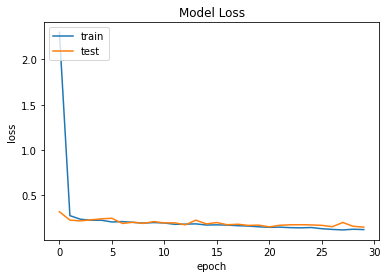

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
y_pred = model.predict(X_predict)
y_pred = [1 if x>=0.5 else 0 for x in y_pred]
confusion_matrix(y_true, y_pred)

array([[1681,   30],
       [  46,  243]])

In [59]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1711
           1       0.89      0.84      0.86       289

    accuracy                           0.96      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.96      0.96      0.96      2000

